# Strat Column Plotting for the Marquette Range Supergroup 

This notebook is for plotting the stratigraphic column in the main text of the manuscript 

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
from matplotlib.patches import Wedge

from pystrat import pystrat
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['font.family']='arial'
plt.rcParams['font.size']=16


In [138]:

IF_litho = pd.read_csv('../data/strat/strat.csv')
IF_strat = pystrat.Section(IF_litho['THICKNESS'], IF_litho['FACIES'], units=IF_litho[[ 'FORMATION']])

 
color_style = pd.read_csv('../data/strat/style.csv') # Strat Column Colors
style=pystrat.Style(labels=color_style['facies'],color_values=color_style[['R','G','B']]/255,width_values=color_style['width'],swatch_values=color_style['swatch'])


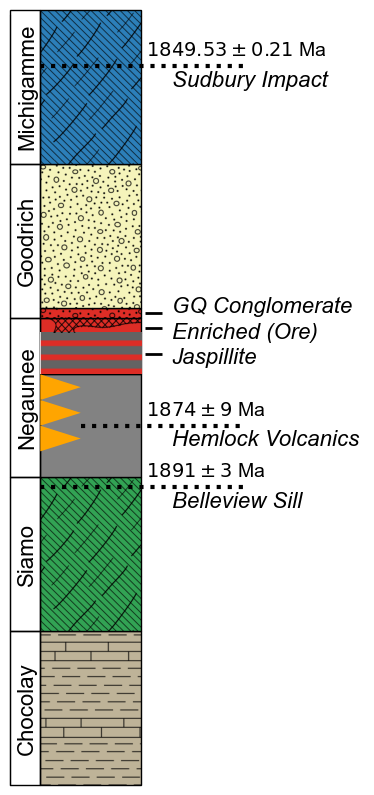

In [240]:

fig = plt.figure(figsize=(3, 10))
# note that due to how swatches are plotted, it is preferrable to define an Axes object with a specified
# ylim to accommodate the section
ax = plt.axes(ylim=[0, 1.5])  

IF_strat.plot(style,ax,label_units=True, unit_label_wid_tot=0.15,unit_fontsize=16)
ax.tick_params('x', top=False,labeltop=False)
ax.spines['bottom'].set_visible(False)
ax.tick_params('x', bottom=False,labelbottom=False)
ax.tick_params('y', left=False,labelleft=False)
ax.set_ylabel(None)

ax.annotate('Jaspillite',(0.65,0.82),fontsize=16,fontstyle='italic')
ax.annotate('Enriched (Ore)',(0.65,0.87),fontsize=16,fontstyle='italic')
ax.annotate('GQ Conglomerate',(0.65,0.92),fontsize=16,fontstyle='italic')

ax.annotate('Sudbury Impact ',(0.65,1.36),fontsize=16,fontstyle='italic')
ax.annotate(r' $1849.53 \pm 0.21$ Ma',(0.5,1.42),fontsize=14)

ax.annotate('Hemlock Volcanics ',(0.65,0.66),fontsize=16,fontstyle='italic')
ax.annotate(r' $1874 \pm 9$ Ma',(0.5,0.72),fontsize=14)

ax.annotate('Belleview Sill ',(0.65,0.54),fontsize=16,fontstyle='italic')
ax.annotate(r' $1891 \pm 3$ Ma',(0.5,0.6),fontsize=14)


ax.hlines(1.4,0,1,linestyles='dotted',linewidth=3,color='black',)#sudbury 
ax.hlines(0.58,0,1,linestyles='dotted',linewidth=3,color='black')#Belleview
ax.hlines(0.7,0.2,1,linestyles='dotted',linewidth=3,color='black')#Hemlock 

ax.hlines(0.84,0.52,0.6,linewidth=2,color='black')
ax.hlines(0.89,0.52,0.6,linewidth=2,color='black')
ax.hlines(0.92,0.52,0.6,linewidth=2,color='black')


ax.fill((0.0,0.0,0.2,0.0),(0.8,0.75,0.775,0.8),'#FFA500')
ax.fill((0.0,0.0,0.2,0.0),(0.75,0.7,0.725,0.75),'#FFA500')
ax.fill((0.0,0.0,0.2,0.0),(0.7,0.65,0.675,0.7),'#FFA500')


ax.grid(False)

plt.savefig('../figures/map/strat_column.pdf',bbox_inches='tight',dpi=300)